<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/malaria_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# useful for getting number of classes
folders = glob('cell_images/*')
folders

['cell_images\\Parasitized', 'cell_images\\Uninfected']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)


In [ ]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# tell the model what cost and optimization method to use


In [ ]:
#cnn model for the same : above is transfer learning
#model=Sequential()
#model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=[224,224]+[3]))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Flatten())
#model.add(Dense(500,activation='relu'))
#model.add(Dense(2,activation='softmax'))
#model.build()
#model.summary()

In [ ]:

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
           #image data augmentation zooming,shearing and scaling
                                   
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('cell_images',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('cell_images',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 27558 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
#epoch size=5

767/862 [=========================>....] - ETA: 12:46 - loss: 0.3797 - accuracy: 0.8421

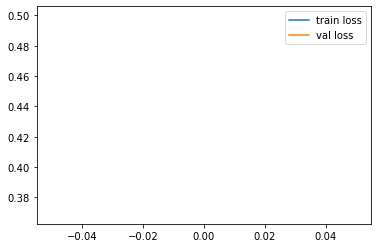

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')


In [ ]:
# fit the model

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



KeyError: 'acc'

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

Instructions for updating:
Please use Model.fit, which supports generators.


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.